#**Descriptografando os dados**

In [1]:
!curl -s https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/notebooks/2022_11_29/rdv.py -o rdv.py

In [2]:
!pip install asn1crypto==1.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 KB 7.8 MB/s eta 0:00:00


In [3]:
!python rdv.py -r o00407-2207100040241.rdv > rdv.txt

2023-03-03 17:53:47,844 - INFO - Converte RDV o00407-2207100040241.rdv


####**Limpando os dados**

In [4]:
content = []

with open(file="rdv.txt", mode="r") as fp:
  for line in fp.readlines():
    if "Governador" in line:
      break
    else:
      content.append(line) 

In [5]:
len(content)

250

In [6]:
for line in content[0:10]:
  print(line)


----------------------------------------

Presidente

  1 - nominal  - [13]

  2 - nominal  - [13]

  3 - nominal  - [13]

  4 - nominal  - [13]

  5 - nominal  - [13]

  6 - nominal  - [13]

  7 - nominal  - [13]



####**Extração de dados**

In [7]:
import re

pattern = re.compile(pattern="\[(.*?)\]")

In [8]:
votes = []

for line in content:

  if "branco" in line:

    votes.append({"voto": "branco", "quantidade": 1})

  if "nulo" in line:

    votes.append({"voto": "nulo", "quantidade": 1})

  if "nominal" in line:

    vote = re.findall(pattern=pattern, string=line)[0]
    votes.append({"voto": f"{vote}", "quantidade": 1})

In [9]:
len(votes)

for vote in votes[0:10]:
  print(vote)

{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}


####**Processamento de dados**

In [10]:
for vote in votes[0:10]:
  print(vote)

{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}


In [11]:
import pandas as pd

Dataframe

In [12]:
votes_table = pd.DataFrame(votes)

votes_table.tail(n=30)

votes_table.shape

votes_table.to_csv("rdv.csv", header=True, index=False)

Agregação

In [13]:
votes_table_agg = votes_table.groupby('voto').agg('sum').reset_index()

votes_table_agg

,voto,quantidade
0,13,158
1,22,66
2,branco,4
3,nulo,18


In [14]:
#Ordenação dos dados

votes_table_agg = votes_table_agg.sort_values(by='quantidade', ascending=False)
votes_table_agg

,voto,quantidade
0,13,158
1,22,66
3,nulo,18
2,branco,4


In [15]:
#Adição de uma coluna

votes_table_agg['quantidade_pct'] = round(100 * (votes_table_agg['quantidade'] / votes_table_agg['quantidade'].sum()), 2)
votes_table_agg

,voto,quantidade,quantidade_pct
0,13,158,64.23
1,22,66,26.83
3,nulo,18,7.32
2,branco,4,1.63


####**Visualização**

In [16]:
import seaborn as sns

In [19]:
URNA = "Sapé/PB - 004 - 241"

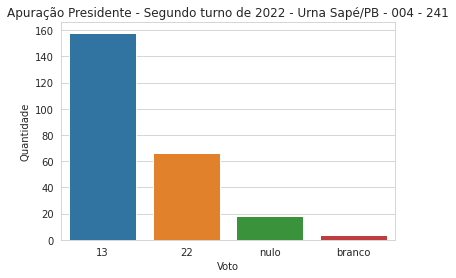

In [20]:
#quantidade de votos absolutos

x_column = 'voto'
y_column = 'quantidade'

title = f'Apuração Presidente - Segundo turno de 2022 - Urna {URNA}'
x_lable = 'Voto'
y_lable = 'Quantidade'

with sns.axes_style('whitegrid'):
  chart = sns.barplot(data=votes_table_agg, x=x_column, y=y_column)
  chart.set(title=title, xlabel=x_lable, ylabel=y_lable);

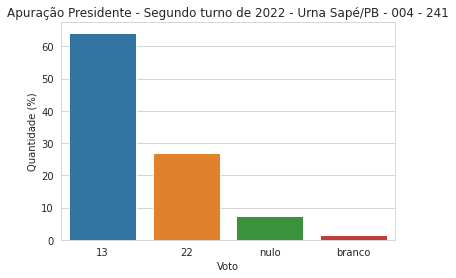

In [21]:
#quantidade de votos relativos

x_column = 'voto'
y_column = 'quantidade_pct'

title = f'Apuração Presidente - Segundo turno de 2022 - Urna {URNA}'
x_lable = 'Voto'
y_lable = 'Quantidade (%)'

with sns.axes_style('whitegrid'):
  chart = sns.barplot(data=votes_table_agg, x=x_column, y=y_column)
  chart.set(title=title, xlabel=x_lable, ylabel=y_lable);